In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
# Regression Related lib

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [7]:
import os
os.getcwd()
os.chdir('..')

In [8]:
car = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
car.head()

In [ ]:
car.shape

In [ ]:
car.info(memory_usage=True,null_counts=True)

In [9]:
train = car.drop(columns='car_ID')

In [ ]:
train.shape

In [ ]:
train.info()

In [ ]:
train.head()


In [10]:
train.get_dtype_counts()

int64       7
object     10
float64     8
dtype: int64

#### Extract the brand name from CarName Variable

In [11]:
train['brand_Name'] = train['CarName'].str.split(expand=True)[0]

In [ ]:
train.get_dtype_counts()

In [12]:

train = train.drop(columns='CarName')

In [ ]:
train.head()

In [ ]:
train.get_dtype_counts()

In [ ]:
train.memory_usage(deep=True)

In [ ]:
train.get_dtype_counts()

                        #### Check the data Quality on Each Variable

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [ ]:
train.get_dtype_counts()

In [ ]:
train.columns

In [ ]:
train['fueltype'].value_counts()

In [ ]:
train['aspiration'].value_counts()

In [ ]:
train['doornumber'].value_counts()

In [ ]:
train['carbody'].value_counts()

In [ ]:
train['drivewheel'].value_counts()

In [ ]:
train['enginelocation'].value_counts()

In [ ]:
train['cylindernumber'].value_counts()

In [ ]:
train['fuelsystem'].value_counts()

In [14]:
train['fuelsystem'] = train['fuelsystem'].replace({'mfi':'mpfi','spfi':'spdi'})

In [ ]:
train['fuelsystem'].value_counts()

In [ ]:
train.get_dtype_counts()

In [ ]:
train.brand_Name.value_counts()


In [15]:
train['brand_Name'] = train.brand_Name.replace({'vw':'volkswagen','vokswagen':'volkswagen','maxda':'mazda',
                                           'toyouta':'toyota','Nissan':'nissan','porcshce':'porsche'})

In [ ]:
train.brand_Name.value_counts()

In [ ]:
train.enginetype.value_counts()

In [16]:
train['enginetype'] = train['enginetype'].replace({'dohcv':'dohc'})

In [ ]:
train.enginetype.value_counts()

In [ ]:
train.brand_Name.value_counts()

In [ ]:
train.get_dtype_counts()

-                                                # Summary #

1. identified data entry error in brand Variable- Resolved
2. No Missing Data -- Good
3. Check Outliers in the data - YTS

                                            # Univarite Analysis

In [17]:
Number_data = train.select_dtypes(include= ['number'])

In [ ]:
Number_data.shape

In [18]:
Category_data = train.select_dtypes(include=['object'])

In [ ]:
Category_data.shape

In [ ]:
corr = Number_data.corr().round(3)
corr


In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True,cmap='summer_r')

### Summary
# looks data is having multple Collenarity problem, 


In [ ]:
Number_data.columns

In [ ]:
fig, ax_array = plt.subplots(5,3, linewidth=3,figsize=(10,15))
(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)= ax_array

sns.boxplot(y='symboling',data=Number_data,ax=ax1)
sns.boxplot(y='wheelbase',data=Number_data,ax=ax2)
sns.boxplot(y='carlength',data=Number_data,ax=ax3)
sns.boxplot(y='carwidth',data=Number_data,ax=ax4)
sns.boxplot(y='carheight',data=Number_data,ax=ax5)
sns.boxplot(y='curbweight',data=Number_data,ax=ax6)
sns.boxplot(y='enginesize',data=Number_data,ax=ax7)
sns.boxplot(y='boreratio',data=Number_data,ax=ax8)
sns.boxplot(y='stroke',data=Number_data,ax=ax9)
sns.boxplot(y='compressionratio',data=Number_data,ax=ax10)
sns.boxplot(y='horsepower',data=Number_data,ax=ax11)
sns.boxplot(y='peakrpm',data=Number_data,ax=ax12)
sns.boxplot(y='citympg',data=Number_data,ax=ax13)
sns.boxplot(y='highwaympg',data=Number_data,ax=ax14)
sns.boxplot(y='price',data=Number_data,ax=ax15)

In [ ]:
Category_data.columns

In [ ]:
fig, ax_array = plt.subplots(3,3, linewidth=3,figsize=(15,15))
(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)= ax_array

sns.countplot('fueltype',data=Category_data,ax=ax1)
sns.countplot('aspiration',data=Category_data,ax=ax2)
sns.countplot('doornumber',data=Category_data,ax=ax3)
sns.countplot('carbody',data=Category_data,ax=ax4,order=Category_data.carbody.value_counts().index)
sns.countplot('drivewheel',data=Category_data,ax=ax5,order=Category_data.drivewheel.value_counts().index)
sns.countplot('enginelocation',data=Category_data,ax=ax6)
sns.countplot('enginetype',data=Category_data,ax=ax7,order=Category_data.enginetype.value_counts().index)
sns.countplot('cylindernumber',data=Category_data,ax=ax8,order=Category_data.cylindernumber.value_counts().index)
sns.countplot('fuelsystem',data=Category_data,ax=ax9,order=Category_data.fuelsystem.value_counts().index)

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('brand_Name',data=Category_data,order=Category_data.brand_Name.value_counts().index,palette="Blues_r")
plt.xticks(rotation=35)
              

###                                        ### Univarite Analysis Summary ####

1. Indepent Variables (Following Variables) having the High Correlaction, Which leads Multicollinority problem 
                
                Wheelbase,
                Carlength,
                Carwidth,
                crubhight, 
                CarHight,
                enginesize,
                boreratio 
                

2.Outlier Issues : (Univarite Analysis)

        Wheelbase, 
        Carlength, 
        Carwidth,
        enginesize,stoke,
        compressionratio,
        horsepower,
        peakrpm,citympg,
        highwaympg
        
3. as per distrubution Most of the cars brands in Toyota, least cars in mercury
4. Most of the cars having 4 Cylenders, and Gas Vehicals....etc                         

### Dependent Variable : 'Price'         ==========BiVarite Analysis=======


1. For numbers data we have already done the correlaction Analysis. please see below Comments
    
   High positive Correlaction with Dependent variable
    
    Hoursepower
    Boreratio
    EngineSize
    Curbweigth
    Carwidth
    Carlength
    wheelbase
   
   below variables are high negitive Coorelaction
   
   Highwaympg
   citympg
   peakrpm
   symbolling


In [ ]:
fig, ax_array = plt.subplots(5,3, linewidth=3,figsize=(20,20))
(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)= ax_array

sns.regplot(x='symboling',y='price',data=Number_data,ax=ax1,marker="+")
sns.regplot(x='wheelbase',y='price',data=Number_data,ax=ax2)
sns.regplot(x='carlength',y='price',data=Number_data,ax=ax3)
sns.regplot(x='carwidth',y='price',data=Number_data,ax=ax4)
sns.regplot(x='carheight',y='price',data=Number_data,ax=ax5)
sns.regplot(x='curbweight',y='price',data=Number_data,ax=ax6)
sns.regplot(x='enginesize',y='price',data=Number_data,ax=ax7)
sns.regplot(x='boreratio',y='price',data=Number_data,ax=ax8)
sns.regplot(x='stroke',y='price',data=Number_data,ax=ax9)
sns.regplot(x='compressionratio',y='price',data=Number_data,ax=ax10)
sns.regplot(x='horsepower',y='price',data=Number_data,ax=ax11)
sns.regplot(x='peakrpm',y='price',data=Number_data,ax=ax12)
sns.regplot(x='citympg',y='price',data=Number_data,ax=ax13)
sns.regplot(x='highwaympg',y='price',data=Number_data,ax=ax14)

In [19]:
Category_data['price'] = train['price']

In [ ]:
Category_data.columns

In [ ]:
fig, ax_array = plt.subplots(3,3, linewidth=3,figsize=(15,15))
(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)= ax_array

sns.boxplot(y='fueltype',x='price',data=Category_data,ax=ax1)
sns.boxplot(x='aspiration',y='price',data=Category_data,ax=ax2)
sns.boxplot(x='doornumber',y='price',data=Category_data,ax=ax3)
sns.boxplot(x='carbody',y='price',data=Category_data,ax=ax4,order=Category_data.carbody.value_counts().index)
sns.boxplot(x='drivewheel',y='price',data=Category_data,ax=ax5,order=Category_data.drivewheel.value_counts().index)
sns.boxplot(x='enginelocation',y='price',data=Category_data,ax=ax6)
sns.boxplot(x='enginetype',y='price',data=Category_data,ax=ax7,order=Category_data.enginetype.value_counts().index)
sns.boxplot(x='cylindernumber',y='price',data=Category_data,ax=ax8,order=Category_data.cylindernumber.value_counts().index)
sns.boxplot(x='fuelsystem',y='price',data=Category_data,ax=ax9,order=Category_data.fuelsystem.value_counts().index)

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x='brand_Name',y='price',data=Category_data)
plt.xticks(rotation=35)

Dependent Variable : 'Price'         ==========BiVarite Analysis=======


1. As per the Boxplot Categorical data is havig sig with Price Variable
2. Outliers also available after relating the price variable
  

In [20]:
Category_data = Category_data.drop(columns='price')

In [ ]:
Category_data.columns

### Creating the Dummy Variables on Categorical Data

    1. If Coloums having 2 Factors, will assign vlaues as 1 and 0
    2. If Coloums having more than 2 factors will assign dummy variables with (n-1)
            example: Colum having 5 factors, we create the 4 differnt variables and if all Variables is 0, it means that row is fifth factors

In [ ]:
Category_data.head()

In [21]:
Category_data['fueltype'] = Category_data['fueltype'].map({'gas':1,'diesel':0})
Category_data['aspiration'] = Category_data['aspiration'].map({'std':1,'turbo':0})
Category_data['doornumber'] = Category_data['doornumber'].map({'four':1,'two':0})
Category_data['enginelocation'] = Category_data['enginelocation'].map({'front':1,'rear':0})

In [ ]:
Category_data.head()

In [22]:
carbody = Category_data['carbody']
drivewheel = Category_data['drivewheel']
enginetype = Category_data['enginetype']
cylindernumber = Category_data['cylindernumber']
fuelsystem = Category_data['fuelsystem']
brand_Name = Category_data['brand_Name']

In [23]:
drop = ['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','brand_Name']

In [24]:
carbody = pd.get_dummies(carbody,prefix='carbody_',drop_first=True)
drivewheel = pd.get_dummies(drivewheel,prefix='drivewheel_',drop_first=True)
enginetype = pd.get_dummies(enginetype,prefix='enginetype_',drop_first=True)
cylindernumber = pd.get_dummies(cylindernumber,prefix='cylindernumber_',drop_first=True)
fuelsystem = pd.get_dummies(fuelsystem,prefix='fuelsystem_',drop_first=True)
brand_Name = pd.get_dummies(brand_Name,prefix='brand_Name_',drop_first=True)

In [ ]:
print(type(carbody))

In [25]:
Category_data_final = pd.concat([Category_data,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,brand_Name],axis=1)

In [26]:
Category_data_final = Category_data_final.drop(columns=drop)

In [27]:
Category_data_final.head()

,fueltype,aspiration,doornumber,enginelocation,carbody__hardtop,carbody__hatchback,carbody__sedan,carbody__wagon,drivewheel__fwd,drivewheel__rwd,...,brand_Name__nissan,brand_Name__peugeot,brand_Name__plymouth,brand_Name__porsche,brand_Name__renault,brand_Name__saab,brand_Name__subaru,brand_Name__toyota,brand_Name__volkswagen,brand_Name__volvo
0,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Handling the Outliers Values on number data

In [28]:
def Outlier(x):
    first_quantile = np.quantile(x,0.25)
    third_quantile = np.quantile(x,0.75)
    quartiles = np.quantile(a=x,q=[0.05,0.1,0.90,0.95,0.96,0.97,0.98,0.99,1])
    IQR = (third_quantile - first_quantile)
    Upper_fence = third_quantile+(IQR*1.5)
    lower_fence = first_quantile-(IQR*1.5)
    
    return({'1st Quartile':first_quantile,
           '3rd_quantile':third_quantile,
            'IQR':IQR.round(3),
           'Upper_fence':Upper_fence,
           'lower_fence':lower_fence,
           'quartiles':quartiles})
    
   

In [29]:
Outlier(Number_data.highwaympg)

{'1st Quartile': 25.0,
 '3rd_quantile': 34.0,
 'IQR': 9.0,
 'Upper_fence': 47.5,
 'lower_fence': 11.5,
 'quartiles': array([22.  , 23.  , 38.  , 42.8 , 43.  , 45.64, 46.92, 49.88, 54.  ])}

In [ ]:
Number_data.highwaympg.describe()

In [30]:
Number_data['carlength'] = np.where(Number_data['carlength'] < 157.3, 157.3, Number_data['carlength'])
Number_data['carwidth'] = np.where(Number_data['carwidth'] > 71, 71, Number_data['carwidth'])
Number_data['enginesize'] = np.where(Number_data['enginesize'] > 201.2, 201.2, Number_data['enginesize'])
Number_data['stroke'] = np.where(Number_data['stroke'] > 3.86, 3.86, Number_data['stroke'])
Number_data['stroke'] = np.where(Number_data['stroke'] < 2.8, 2.8, Number_data['stroke'])
Number_data['compressionratio'] = np.where(Number_data['compressionratio'] > 10, 10, Number_data['compressionratio'])
Number_data['compressionratio'] = np.where(Number_data['compressionratio'] < 7.8, 7.8, Number_data['compressionratio'])
Number_data['wheelbase'] = np.where(Number_data['wheelbase'] > 114.2,114.2, Number_data['wheelbase'])
Number_data['horsepower'] = np.where(Number_data['horsepower'] > 184,184, Number_data['horsepower'])
Number_data['peakrpm'] = np.where(Number_data['peakrpm'] > 6000,6000, Number_data['peakrpm'])
Number_data['citympg'] = np.where(Number_data['citympg'] > 44.72,44.72, Number_data['citympg'])
Number_data['highwaympg'] = np.where(Number_data['highwaympg'] > 46.92,46.92, Number_data['highwaympg'])

In [ ]:
fig, ax_array = plt.subplots(5,3, linewidth=3,figsize=(10,15))
(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)= ax_array

sns.boxplot(y='symboling',data=Number_data,ax=ax1)
sns.boxplot(y='wheelbase',data=Number_data,ax=ax2)
sns.boxplot(y='carlength',data=Number_data,ax=ax3)
sns.boxplot(y='carwidth',data=Number_data,ax=ax4)
sns.boxplot(y='carheight',data=Number_data,ax=ax5)
sns.boxplot(y='curbweight',data=Number_data,ax=ax6)
sns.boxplot(y='enginesize',data=Number_data,ax=ax7)
sns.boxplot(y='boreratio',data=Number_data,ax=ax8)
sns.boxplot(y='stroke',data=Number_data,ax=ax9)
sns.boxplot(y='compressionratio',data=Number_data,ax=ax10)
sns.boxplot(y='horsepower',data=Number_data,ax=ax11)
sns.boxplot(y='peakrpm',data=Number_data,ax=ax12)
sns.boxplot(y='citympg',data=Number_data,ax=ax13)
sns.boxplot(y='highwaympg',data=Number_data,ax=ax14)

In [ ]:
corr = Number_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True,cmap='summer_r',annot_kws={'size':12})


In [ ]:
# Merging the data (Numberic and Categorical Data)

In [31]:
Final_data = pd.concat([Number_data,Category_data_final],axis=1)

In [ ]:
Final_data.head()

In [32]:
# Required Data normality
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

In [33]:
Final_data = Final_data.apply(normalize)

In [ ]:
Final_data.head()

In [ ]:
Final_data.columns

In [42]:
X = Final_data.drop(columns='price')

In [43]:
y = Final_data['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 61)
(62, 61)
(143,)
(62,)


In [47]:
# Build the model in linear regression with 20 Features

lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=20,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

In [80]:
# Check the intercet and Slope Values
print(lm_RFE.support_)


[False False False  True False False False False False False  True False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False  True
 False False False False False False False False False False False False
 False]


In [49]:
col = X_train.columns[lm_RFE.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'enginelocation', 'carbody__hatchback', 'carbody__sedan',
       'carbody__wagon', 'enginetype__ohcf', 'cylindernumber__five',
       'cylindernumber__four', 'cylindernumber__six', 'cylindernumber__two',
       'brand_Name__bmw', 'brand_Name__buick', 'brand_Name__jaguar',
       'brand_Name__peugeot', 'brand_Name__porsche', 'brand_Name__subaru'],
      dtype='object')

In [50]:
# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model = sm.OLS(y_train,X_train_RFE).fit()

In [51]:
# Check the Summary of model

print(lm_model.summary())

# After building the 20 features, below variables are not having the sig
# wheelbase    
# cylindernumber__six
# cylindernumber__two
# cylindernumber__five

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.34e-78
Time:                        06:23:34   Log-Likelihood:                 267.68
No. Observations:                 143   AIC:                            -495.4
Df Residuals:                     123   BIC:                            -436.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0019 

In [52]:
# VIF for calculating vif value
def VIF(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [53]:
Final_data.columns.difference(X_train_RFE.columns)

Index(['aspiration', 'boreratio', 'brand_Name__audi', 'brand_Name__chevrolet',
       'brand_Name__dodge', 'brand_Name__honda', 'brand_Name__isuzu',
       'brand_Name__mazda', 'brand_Name__mercury', 'brand_Name__mitsubishi',
       'brand_Name__nissan', 'brand_Name__plymouth', 'brand_Name__renault',
       'brand_Name__saab', 'brand_Name__toyota', 'brand_Name__volkswagen',
       'brand_Name__volvo', 'carbody__hardtop', 'carheight', 'carlength',
       'citympg', 'compressionratio', 'cylindernumber__three',
       'cylindernumber__twelve', 'doornumber', 'drivewheel__fwd',
       'drivewheel__rwd', 'enginetype__l', 'enginetype__ohc',
       'enginetype__ohcv', 'enginetype__rotor', 'fuelsystem__2bbl',
       'fuelsystem__4bbl', 'fuelsystem__idi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fueltype', 'highwaympg', 'peakrpm', 'price',
       'stroke', 'symboling'],
      dtype='object')

In [54]:
drop = ['aspiration', 'boreratio', 'brand_Name__audi', 'brand_Name__chevrolet',
       'brand_Name__dodge', 'brand_Name__honda', 'brand_Name__isuzu',
       'brand_Name__mazda', 'brand_Name__mercury', 'brand_Name__mitsubishi',
       'brand_Name__nissan', 'brand_Name__plymouth', 'brand_Name__renault',
       'brand_Name__saab', 'brand_Name__toyota', 'brand_Name__volkswagen',
       'brand_Name__volvo', 'carbody__hardtop', 'carheight', 'carlength',
       'citympg', 'compressionratio', 'cylindernumber__three',
       'cylindernumber__twelve', 'doornumber', 'drivewheel__fwd',
       'drivewheel__rwd', 'enginetype__l', 'enginetype__ohc',
       'enginetype__ohcv', 'enginetype__rotor', 'fuelsystem__2bbl',
       'fuelsystem__4bbl', 'fuelsystem__idi', 'fuelsystem__mpfi',
       'fuelsystem__spdi', 'fueltype', 'highwaympg', 'peakrpm', 'stroke',
       'symboling']

In [55]:
print('VIFthroshold:',1/(1-0.963))
VIF(input_data=Final_data.drop(columns=drop),dependent_col='price')

# Still VIF Having some Proble

VIFthroshold: 27.027027027027003


,Var,Vif
19,brand_Name__subaru,inf
9,enginetype__ohcf,inf
5,enginelocation,inf
2,curbweight,18.000000
3,enginesize,14.160000
11,cylindernumber__four,10.670000
1,carwidth,7.900000
12,cylindernumber__six,7.680000
7,carbody__sedan,6.920000
0,wheelbase,6.070000


In [56]:
# Build the model in linear regression with 15 Features
lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=15,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

In [57]:
col = X_train.columns[lm_RFE.support_]

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model1 = sm.OLS(y_train,X_train_RFE).fit()
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     212.1
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           2.83e-81
Time:                        06:26:06   Log-Likelihood:                 259.54
No. Observations:                 143   AIC:                            -489.1
Df Residuals:                     128   BIC:                            -444.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0012 

In [59]:
# Check the VIF Problems in the Data
remove = X_train.columns.difference(X_train_RFE.columns)
print('VIFthroshold:',1/(1-0.959))
VIF(input_data=Final_data.drop(columns=remove),dependent_col='price') ### Still Coupal of Variables having inf Values

VIFthroshold: 24.390243902439003


,Var,Vif
4,enginelocation,inf
8,enginetype__ohcf,inf
14,brand_Name__subaru,inf
1,curbweight,11.570000
2,enginesize,7.100000
6,carbody__sedan,6.160000
5,carbody__hatchback,5.770000
0,carwidth,5.360000
3,horsepower,4.760000
7,carbody__wagon,3.550000


In [60]:
# Build the model in linear regression with 12 Features
lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=12,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

# Find out the 13 Features which RFE is selected
col = X_train.columns[lm_RFE.support_]

# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model2 = sm.OLS(y_train,X_train_RFE).fit()
print(lm_model2.summary())

# Looks all the variables having the good Sig
# R_Squared and Adjusted R_squared is Good
# All Variables P Values is Good

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     229.7
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           2.93e-81
Time:                        06:26:41   Log-Likelihood:                 253.41
No. Observations:                 143   AIC:                            -480.8
Df Residuals:                     130   BIC:                            -442.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0019    

In [61]:
# Check the VIF Problems in the Data
remove = X_train.columns.difference(X_train_RFE.columns)
print('VIFthroshold:',1/(1-0.955))
VIF(input_data=Final_data.drop(columns=remove),dependent_col='price') ### Looks VIF Values is Good excepet Crubweight

VIFthroshold: 22.222222222222204


,Var,Vif
1,curbweight,11.46
2,enginesize,7.03
6,carbody__sedan,6.07
5,carbody__hatchback,5.65
0,carwidth,5.32
3,horsepower,4.42
7,carbody__wagon,3.44
4,enginelocation,3.07
11,brand_Name__porsche,2.80
9,brand_Name__buick,1.58


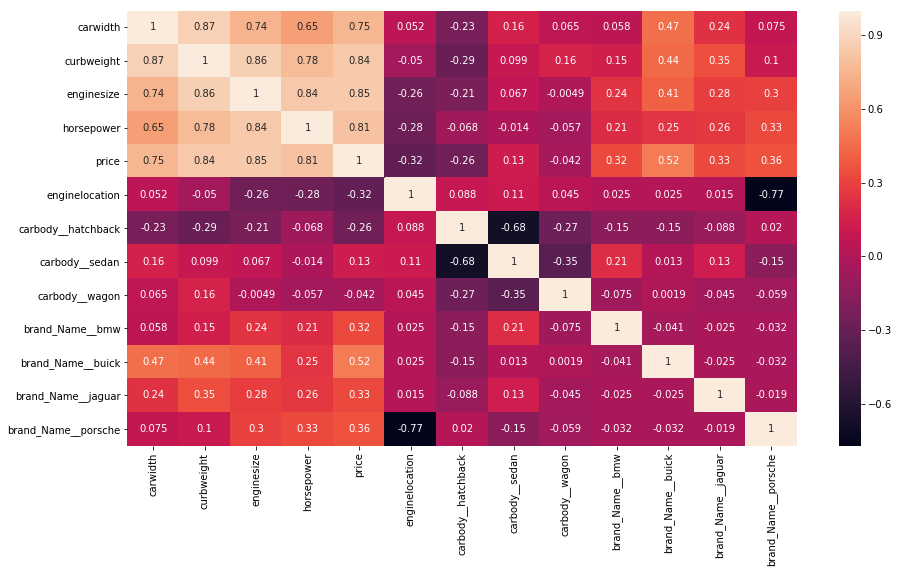

In [62]:
# Check the Corrleaction Matrix
plt.figure(figsize=(15,8))
sns.heatmap(Final_data.drop(columns=remove).corr(),annot=True)

# Predicting Using 12 Features

- Remove the non model variables in test data
- add the Consistant value in testdata
- predict the model in testdata
- Check the Test, and Predicted Values using scatter plot
- Check the Errors Distrubution
- Check the R_Squre , MSE and RMSE Values

In [68]:
# - Remove the non model variables in test data

X_test_12 = X_test.drop(columns=remove)

In [70]:
X_test_12 = sm.add_constant(X_test_12,has_constant='add')

In [71]:
print(X_test_12.shape)
print(X_train_RFE.shape)

(62, 13)
(143, 13)


In [72]:
# predict the model in testdata
predictions = lm_model2.predict(X_test_12)

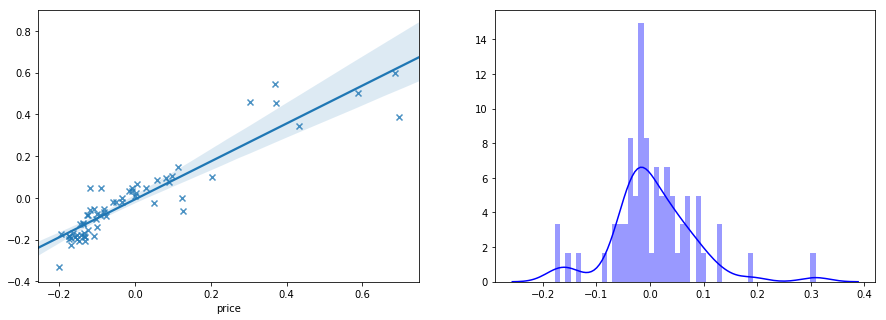

In [73]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.regplot(y_test,predictions,marker='x',ax=ax1)  # Plot looks good
sns.distplot((y_test-predictions),bins=50,color='Blue',ax=ax2) ### Errors are in normality

In [74]:
# Check the Evaluation matrix

MAE = metrics.mean_absolute_error(y_test,predictions)
print({'mean_absolute_error' : MAE})

MSE = metrics.mean_squared_error(y_test,predictions)
print({'mean_squared_error' : MSE})

RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print({'Root mean_squared_error' : RMSE})

r2_score = metrics.r2_score(y_test,predictions)
print({' r2_score' : r2_score})


{'mean_absolute_error': 0.05511516150192274}
{'mean_squared_error': 0.0060812193459038304}
{'Root mean_squared_error': 0.07798217325712224}
{' r2_score': 0.857577897607487}


In [ ]:
index = np.arange(1,63,1)
# Check the actual Values and predicted Values

fig = plt.figure(figsize=(15,5))
plt.plot(index,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(index,predictions, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Price', fontsize=12) 

In [ ]:
# Build the model in linear regression with 9 Features
lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=9,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

# Find out the 9 Features which RFE is selected
col = X_train.columns[lm_RFE.support_]

# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model3 = sm.OLS(y_train,X_train_RFE).fit()
print(lm_model3.summary())

# Looks all the variables having the good Sig
# R_Squared and Adjusted R_squared is Good
# All Variables P Values is Good

In [ ]:
# Check the VIF Problems in the Data
remove = X_train.columns.difference(X_train_RFE.columns)
print('VIFthroshold:',1/(1-0.943))
VIF(input_data=Final_data.drop(columns=remove),dependent_col='price') ### Looks VIF Values is Good excepet Crubweight

In [ ]:
# Check the Corrleaction Matrix
plt.figure(figsize=(15,8))
sns.heatmap(Final_data.drop(columns=remove).corr(),annot=True)

# Predicting Using 9 Features
Remove the non model variables in test data
add the Consistant value in testdata
predict the model in testdata
Check the Test, and Predicted Values using scatter plot
Check the Errors Distrubution
Check the R_Squre , MSE and RMSE Values

In [ ]:
X_test_9 = X_test.drop(columns=remove)

In [ ]:
X_test_9 = sm.add_constant(X_test_9,has_constant='add')

In [ ]:
# predict the model in testdata
predictions = lm_model3.predict(X_test_9)

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.regplot(y_test,predictions,marker='x',ax=ax1)  # Plot looks good
sns.distplot((y_test-predictions),bins=50,color='Blue',ax=ax2) ### Errors are in normality

In [ ]:
# Check the Evaluation matrix

MAE = metrics.mean_absolute_error(y_test,predictions)
print({'mean_absolute_error' : MAE})

MSE = metrics.mean_squared_error(y_test,predictions)
print({'mean_squared_error' : MSE})

RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print({'Root mean_squared_error' : RMSE})

r2_score = metrics.r2_score(y_test,predictions)
print({' r2_score' : r2_score})

In [ ]:
index = np.arange(1,63,1)
# Check the actual Values and predicted Values

fig = plt.figure(figsize=(15,5))
plt.plot(index,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(index,predictions, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Price', fontsize=12) 

In [ ]:
# Build the model in linear regression with 7 Features
lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=7,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

# Find out the 7 Features which RFE is selected
col = X_train.columns[lm_RFE.support_]

# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model4 = sm.OLS(y_train,X_train_RFE).fit()
print(lm_model4.summary())

# Looks all the variables having the good Sig
# R_Squared and Adjusted R_squared is Good
# All Variables P Values is Good

In [ ]:
# Check the VIF Problems in the Data
remove = X_train.columns.difference(X_train_RFE.columns)
print('VIFthroshold:',1/(1-0.934))
VIF(input_data=Final_data.drop(columns=remove),dependent_col='price') ### Looks VIF Values is Good excepet Crubweight

In [ ]:
# Check the Corrleaction Matrix
plt.figure(figsize=(15,8))
sns.heatmap(Final_data.drop(columns=remove).corr(),annot=True)


# Predicting Using 7 Features
Remove the non model variables in test data
add the Consistant value in testdata
predict the model in testdata
Check the Test, and Predicted Values using scatter plot
Check the Errors Distrubution
Check the R_Squre , MSE and RMSE Values

In [ ]:

X_test_7 = X_test.drop(columns=remove)

In [ ]:
X_test_7 = sm.add_constant(X_test_7,has_constant='add')

In [ ]:
# predict the model in testdata
predictions = lm_model4.predict(X_test_7)

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.regplot(y_test,predictions,marker='x',ax=ax1)  # Plot looks good
sns.distplot((y_test-predictions),bins=50,color='Blue',ax=ax2) ### Errors are in normality

In [ ]:
# Check the Evaluation matrix

MAE = metrics.mean_absolute_error(y_test,predictions)
print({'mean_absolute_error' : MAE})

MSE = metrics.mean_squared_error(y_test,predictions)
print({'mean_squared_error' : MSE})

RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print({'Root mean_squared_error' : RMSE})

r2_score = metrics.r2_score(y_test,predictions)
print({' r2_score' : r2_score})


In [ ]:
index = np.arange(1,63,1)
# Check the actual Values and predicted Values

fig = plt.figure(figsize=(15,5))
plt.plot(index,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(index,predictions, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Price', fontsize=12) 

# model with 6 features

In [76]:
# Build the model in linear regression with 6 Features
lm = LinearRegression()
lm_RFE = RFE(lm,n_features_to_select=6,step=1)
lm_RFE = lm_RFE.fit(X_train,y_train)

# Find out the 6 Features which RFE is selected
col = X_train.columns[lm_RFE.support_]

# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]
X_train_RFE = sm.add_constant(X_train_RFE)
lm_model5 = sm.OLS(y_train,X_train_RFE).fit()
print(lm_model5.summary())

# Looks all the variables having the good Sig
# R_Squared and Adjusted R_squared is Good
# All Variables P Values is Good


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     295.8
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.90e-75
Time:                        06:32:31   Log-Likelihood:                 220.68
No. Observations:                 143   AIC:                            -427.4
Df Residuals:                     136   BIC:                            -406.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.345e-05      0

In [77]:
# Check the VIF Problems in the Data
remove = X_train.columns.difference(X_train_RFE.columns)
print('VIFthroshold:',1/(1-0.929))
VIF(input_data=Final_data.drop(columns=remove),dependent_col='price') ### Looks VIF Values is Good 

VIFthroshold: 14.08450704225353


,Var,Vif
0,carwidth,2.37
1,horsepower,2.31
4,brand_Name__buick,1.32
2,enginelocation,1.24
5,brand_Name__jaguar,1.12
3,brand_Name__bmw,1.08


In [ ]:
# Check the Corrleaction Matrix
plt.figure(figsize=(15,8))
sns.heatmap(Final_data.drop(columns=remove).corr(),annot=True)


# Predicting Using 6 Features
    Remove the non model variables in test data
    add the Consistant value in testdata
    predict the model in testdata
    Check the Test, and Predicted Values using scatter plot
    Check the Errors Distrubution
    Check the R_Squre , MSE and RMSE Values

In [79]:
# Remove the non model variables in test data and add the consistant Values
X_test_6 = X_test.drop(columns=remove)
X_test_6 = sm.add_constant(X_test_6,has_constant='add')

print(X_test_6.shape)
print(X_train_6.shape)

(62, 7)


NameError: name 'X_train_6' is not defined

In [ ]:
# predict the model in testdata
predictions = lm_model5.predict(X_test_6)

In [ ]:
# Check the Evaluation matrix

MAE = metrics.mean_absolute_error(y_test,predictions)
print({'mean_absolute_error' : MAE})

MSE = metrics.mean_squared_error(y_test,predictions)
print({'mean_squared_error' : MSE})

RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print({'Root mean_squared_error' : RMSE})

r2_score = metrics.r2_score(y_test,predictions)
print({' r2_score' : r2_score})


In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.regplot(y_test,predictions,marker='x',ax=ax1)  # Plot looks good
sns.distplot((y_test-predictions),bins=50,color='Blue',ax=ax2) ### Errors are in normality

In [ ]:
index = np.arange(1,63,1)
# Check the actual Values and predicted Values

fig = plt.figure(figsize=(15,5))
plt.plot(index,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(index,predictions, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Price', fontsize=12) 

# How to interpret the Coefficent Values

In [ ]:
Coeff = pd.DataFrame(lm_model5.params,columns=['coefficients'])
Coeff

In [ ]:
Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in carwidth is associated with an increase of 0.384552  price 
Holding all other features fixed, a 1 unit increase in horsepower is associated with an increase of 0.260964 total price
Holding all other features fixed, a 1 unit increase in enginelocation is associated with an Decresis of -0.403671 total price
Holding all other features fixed, a 1 unit increase in brand_Name__bmw is associated with an increase of 0.216107 total price
Holding all other features fixed, a 1 unit increase in brand_Name__buick is associated with an increase of 0.331088 total price
Holding all other features fixed, a 1 unit increase in brand_Name__jaguar is associated with an increase of 0.269422 total price
